In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import os
import datetime as dt
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import cmocean
import json
import f90nml
from collections import OrderedDict

fs=16
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

import BiomassConversions

%matplotlib inline



## Import IOS Zooplankton data and create dataframe

In [4]:
ls '/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv'

/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 1995-2011 SoG VNH.csv


In [5]:
df=pd.read_csv('/ocean/ksuchy/MOAD/observe/Data and Code files for KS 2020dec11/2020_05_21 2012-2015 SoG VNH.csv',
               encoding = "ISO-8859-1")

In [6]:
df

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Phylum:,Class:,Order:,Family:,Name,Abundance(#/m3),Biomass(mg/m3),NumberOfSpecies,Station Diversity,Station Equitability
0,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Branchiopoda,Diplostraca,Podonidae,Podon *sp. s1,12.22541,0.06113,51,2.63,0.67
1,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Cirripedia,Thecostraca,NaN,Cirripedia *sp. nauplii s1,30.56351,1.22254,51,2.63,0.67
2,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Amphipoda,Hyperiidae,Themisto pacifica juvenile s1,6.11270,1.44871,51,2.63,0.67
3,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,NaN,Caridea *sp. zoea s1,3.05635,0.07030,51,2.63,0.67
4,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Arthropoda,Malacostraca,Decapoda,Hippolytidae,Hippolytidae *sp. mysis s2,0.09551,0.06017,51,2.63,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60225,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Ctenophora,Tentaculata,Cydippida,Pleurobrachiidae,Pleurobrachia bachei s2,0.25316,0.31797,44,2.56,0.67
60226,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Ectoprocta,Gymnolaemata,NaN,NaN,Bryozoa *sp. cyphonautes s1,48.60759,0.06319,44,2.56,0.67
60227,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Mollusca,Bivalvia,Pholadomyoida,NaN,Bivalvia *sp. veligers s1,21.60338,0.01296,44,2.56,0.67
60228,SOO2015095000801,Tidal Mixed,MAC41,Citizen Science,-123.409,48.402,7/27/2015,13:00,Daylight,SCOR VNH,...,Mollusca,Cephalopoda,Teuthida,Gonatidae,Berryteuthis magister s2,0.08439,0.46414,44,2.56,0.67


In [7]:
df.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability'],
      dtype='object')

### Convert date to proper format

In [8]:
df['Date'][0],df['STN_TIME'][0]

('6/14/2012', '7:32')

In [9]:
df['Date'][1000:1020]

1000    6/15/2012
1001    6/15/2012
1002    6/15/2012
1003    6/15/2012
1004    6/15/2012
1005    6/15/2012
1006    6/15/2012
1007    6/15/2012
1008    6/15/2012
1009    6/15/2012
1010    6/15/2012
1011    6/15/2012
1012    6/15/2012
1013    6/15/2012
1014    6/15/2012
1015    6/15/2012
1016    6/15/2012
1017    6/15/2012
1018    6/15/2012
1019    6/15/2012
Name: Date, dtype: object

In [10]:
df['Date'][0].split('/')

['6', '14', '2012']

In [11]:
dateslist=list()

In [12]:
for el in df['Date']:
    dateslist.append(el.split('/'))

In [13]:
timeslist=list()
for el in df['STN_TIME']:
    timeslist.append(el.split(':'))

In [14]:
dts=list()
for ii,jj in zip(dateslist,timeslist):
    dts.append(dt.datetime(int(ii[2]),int(ii[0]),int(ii[1]),int(jj[0]),int(jj[1])))

In [15]:
df.loc[df.Twilight=='Daylight']['STN_TIME'].unique()

array(['7:32', '7:52', '3:30', '7:42', '7:49', '15:09', '16:30', '22:09',
       '22:27', '19:36', '19:53', '9:21', '9:35', '13:29', '13:45',
       '19:25', '19:43', '5:26', '5:43', '5:45', '5:47', '5:56', '5:59',
       '8:38', '8:39', '8:40', '8:41', '8:57', '11:10', '11:44', '11:45',
       '11:47', '11:48', '11:49', '12:40', '12:42', '15:14', '15:15',
       '15:16', '15:17', '15:18', '17:54', '17:55', '17:57', '17:58',
       '17:59', '5:39', '6:05', '14:47', '15:02', '19:13', '19:30',
       '14:32', '14:49', '20:04', '20:24', '20:27', '20:47', '9:37',
       '9:48', '13:57', '14:17', '19:41', '19:59', '7:18', '7:53', '9:25',
       '12:57', '13:09', '7:30', '7:45', '13:33', '13:36', '13:38',
       '10:00', '10:30', '11:00', '11:30', '12:30', '13:00', '13:30',
       '16:00', '17:00', '9:29', '10:26', '11:19', '13:39', '9:16',
       '10:04', '10:42', '11:03', '9:00', '9:41', '10:17', '10:40',
       '12:00', '9:33', '10:13', '11:11', '12:02', '12:32', '13:22',
       '9:57', '

In [16]:
df['dtUTC']=et.pac_to_utc(dts) #convert from Pac time to UTC

In [17]:
dtsutc=et.pac_to_utc(dts)

In [18]:
#load biomass conversions file
dfbc=BiomassConversions.LoadConversions()

In [19]:
#merge original dataframe and conversions file
df2=pd.merge(df,dfbc,how='inner',left_on=['Name'],right_on=['Species'])

In [20]:
df2.head()

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,Order,Species,PugetSound_LW_Regression,Function Name,c1,c2,c3,c4,SoGLength,BiomassPerIndividual
0,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,Thecostraca,Cirripedia *sp. nauplii s1,((1.34/0.3155)*[Length(mm))*42.5%,PugetSound6,1.34,0.3155,1.0,0.425,0.6,0.001083
1,IOS2012005001001,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:52,Daylight,SCOR VNH,...,Thecostraca,Cirripedia *sp. nauplii s1,((1.34/0.3155)*[Length(mm))*42.5%,PugetSound6,1.34,0.3155,1.0,0.425,0.6,0.001083
2,IOS2012005003601,Central Strait of Georgia,CPF1,Str. Geo.,-124.086,49.367,6/15/2012,7:42,Daylight,SCOR VNH,...,Thecostraca,Cirripedia *sp. nauplii s1,((1.34/0.3155)*[Length(mm))*42.5%,PugetSound6,1.34,0.3155,1.0,0.425,0.6,0.001083
3,IOS2012005003701,Central Strait of Georgia,CPF1,Str. Geo.,-124.085,49.367,6/15/2012,7:49,Daylight,SCOR VNH,...,Thecostraca,Cirripedia *sp. nauplii s1,((1.34/0.3155)*[Length(mm))*42.5%,PugetSound6,1.34,0.3155,1.0,0.425,0.6,0.001083
4,IOS2012005004301,Central Strait of Georgia,GEO1,Str. Geo.,-123.749,49.250,6/15/2012,15:09,Daylight,SCOR VNH,...,Thecostraca,Cirripedia *sp. nauplii s1,((1.34/0.3155)*[Length(mm))*42.5%,PugetSound6,1.34,0.3155,1.0,0.425,0.6,0.001083


In [21]:
df2.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability', 'dtUTC', 'Order',
       'Species', 'PugetSound_LW_Regression', 'Function Name', 'c1', 'c2',
       'c3', 'c4', 'SoGLength', 'BiomassPerIndividual'],
      dtype='object')

In [22]:
#calculate a new biomass column using Puget Sound carbon conversion equations
df2['NewBiomass']=np.nan
for i,row in df2.iterrows():
    df2.at[i,'NewBiomass']=row['Abundance(#/m3)']*row['BiomassPerIndividual']

In [23]:
#column for old biomass converted to units carbon
df2['OldBiomassC']=(df2['Biomass(mg/m3)']*0.45)

In [24]:
df2['OldIndBiomass']=(df2['OldBiomassC']/df2['Abundance(#/m3)']) #to get old biomass per individual in mg

In [25]:
df2['NewIndBiomass']=(df2['NewBiomass']/df2['Abundance(#/m3)']) #to get new biomass per individual in mg

In [26]:
df2['BiomassDiff']=df2['NewBiomass']-df2['OldBiomassC']

In [27]:
df2['BiomassRatio']=df2['NewIndBiomass']/df2['OldIndBiomass']

In [28]:
df2

,Key,region_name,Station,PROJECT,lon,lat,Date,STN_TIME,Twilight,Net_Type,...,c3,c4,SoGLength,BiomassPerIndividual,NewBiomass,OldBiomassC,OldIndBiomass,NewIndBiomass,BiomassDiff,BiomassRatio
0,IOS2012005000901,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:32,Daylight,SCOR VNH,...,1.0,0.425,0.6,1.083043e-03,3.310159e-02,0.550143,0.018000,1.083043e-03,-0.517041,0.060169
1,IOS2012005001001,Northern Strait of Georgia,22,Str. Geo.,-124.272,49.670,6/14/2012,7:52,Daylight,SCOR VNH,...,1.0,0.425,0.6,1.083043e-03,3.838553e-03,0.063797,0.018000,1.083043e-03,-0.059958,0.060169
2,IOS2012005003601,Central Strait of Georgia,CPF1,Str. Geo.,-124.086,49.367,6/15/2012,7:42,Daylight,SCOR VNH,...,1.0,0.425,0.6,1.083043e-03,2.314349e-02,0.384642,0.018000,1.083043e-03,-0.361499,0.060169
3,IOS2012005003701,Central Strait of Georgia,CPF1,Str. Geo.,-124.085,49.367,6/15/2012,7:49,Daylight,SCOR VNH,...,1.0,0.425,0.6,1.083043e-03,5.275090e-03,0.087669,0.018000,1.083043e-03,-0.082394,0.060171
4,IOS2012005004301,Central Strait of Georgia,GEO1,Str. Geo.,-123.749,49.250,6/15/2012,15:09,Daylight,SCOR VNH,...,1.0,0.425,0.6,1.083043e-03,4.125877e-02,0.685715,0.018000,1.083043e-03,-0.644456,0.060169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18344,IOS2015022012901,Gulf Islands,GI-01,Salacia4,-123.342,48.763,5/8/2015,8:17,Daylight,SCOR VNH,...,1.0,0.450,0.7,5.768782e-04,3.139475e-03,0.019593,0.003600,5.768782e-04,-0.016454,0.160235
18345,IOS2015022015001,Northern Strait of Georgia,22,Salacia5,-124.272,49.670,5/21/2015,12:06,Daylight,SCOR VNH,...,1.0,0.500,0.1,1.202264e-07,2.027270e-07,0.166936,0.099001,1.202264e-07,-0.166936,0.000001
18346,IOS2015099000201,Central Strait of Georgia,GEO1,Str. Geo.,-123.748,49.252,2/15/2015,1:22,Night,SCOR VNH,...,1.0,0.500,4.5,3.635742e-01,1.167073e-02,0.009216,0.287103,3.635742e-01,0.002455,1.266355
18347,IOS2015099000301,Northern Strait of Georgia,11,Str. Geo.,-124.718,49.705,2/15/2015,6:36,Daylight,SCOR VNH,...,1.0,0.500,4.5,3.635742e-01,2.596647e-02,0.020502,0.287062,3.635742e-01,0.005464,1.266533


In [29]:
#displays specific number of decimal places
pd.options.display.float_format = "{:,.2f}".format

In [30]:
#Determine which species are making up most of the biomass in each Order
df2.loc[df2['Order:']=='Calanoida',['Name','OldBiomassC','NewBiomass','BiomassDiff']].groupby(['Name'],as_index=False)\
        .sum().sort_values(['OldBiomassC'],ascending=False).head(50)

,Name,OldBiomassC,NewBiomass,BiomassDiff
40,Metridia pacifica 6F,"1,029.40",303.65,-725.75
46,Neocalanus plumchrus 5,903.79,684.30,-219.49
13,Calanus marshallae 5,679.90,176.93,-502.97
19,Calanus pacificus 5,411.27,78.23,-333.04
51,Pseudocalanus moultoni 6F,351.63,664.13,312.50
20,Calanus pacificus 6F,304.19,69.80,-234.39
49,Paracalanus indicus 6F,253.27,265.81,12.54
18,Calanus pacificus 4,203.16,46.00,-157.16
41,Metridia pacifica 6M,145.83,34.92,-110.91
38,Metridia pacifica 5F,135.31,45.93,-89.38


In [31]:
df2.loc[df2['Order:']=='Calanoida',['Name','OldIndBiomass','NewIndBiomass','BiomassRatio']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['OldIndBiomass'],ascending=False).head(50)

,Name,OldIndBiomass,NewIndBiomass,BiomassRatio
50,Paraeuchaeta elongata 6F,0.75,0.45,0.60
28,Eucalanus bungii 6F,0.31,0.74,2.41
47,Neocalanus plumchrus 6F,0.29,0.36,1.27
48,Neocalanus plumchrus 6M,0.29,0.36,1.27
46,Neocalanus plumchrus 5,0.25,0.19,0.76
29,Eucalanus bungii 6M,0.20,0.70,3.53
14,Calanus marshallae 6F,0.20,0.06,0.29
15,Calanus marshallae 6M,0.16,0.04,0.27
13,Calanus marshallae 5,0.14,0.04,0.26
4,Calanoida *sp. 6M,0.10,0.00,0.00


In [32]:
#Determine which species are making up most of the biomass in each Order
df2.loc[df2['Order:']=='Euphausiacea',['Name','OldBiomassC','NewBiomass','BiomassDiff']].groupby(['Name'],as_index=False)\
        .sum().sort_values(['OldBiomassC'],ascending=False).head(50)

,Name,OldBiomassC,NewBiomass,BiomassDiff
0,Euphausia pacifica F,"1,121.01",967.94,-153.07
2,Euphausia pacifica s2,542.68,459.02,-83.67
4,Euphausia pacifica zoea s1,254.85,161.88,-92.97
9,Thysanoessa raschii F,139.65,136.43,-3.22
1,Euphausia pacifica M,84.37,53.99,-30.38
6,Euphausiidae *sp. zoea (or furcilia) s1,75.56,46.18,-29.39
10,Thysanoessa spinifera F,57.66,27.36,-30.29
7,Thysanoessa longipes F,42.61,29.43,-13.18
5,Euphausiidae *sp. protozoea (or calyptopis) s1,27.55,15.79,-11.76
11,Thysanoessa spinifera s2,18.19,6.79,-11.40


In [33]:
df2.loc[df2['Order:']=='Euphausiacea',['Name','OldIndBiomass','NewIndBiomass','BiomassRatio']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['OldIndBiomass'],ascending=False).head(50)

,Name,OldIndBiomass,NewIndBiomass,BiomassRatio
10,Thysanoessa spinifera F,16.15,7.67,0.47
7,Thysanoessa longipes F,9.54,6.59,0.69
9,Thysanoessa raschii F,6.84,6.68,0.98
0,Euphausia pacifica F,3.83,3.30,0.86
1,Euphausia pacifica M,2.89,1.86,0.66
3,Euphausia pacifica s3,1.57,0.90,0.57
11,Thysanoessa spinifera s2,0.54,0.20,0.37
8,Thysanoessa longipes s2,0.39,0.20,0.51
2,Euphausia pacifica s2,0.29,0.25,0.85
4,Euphausia pacifica zoea s1,0.07,0.05,0.64


In [34]:
#Determine which species are making up most of the biomass in each Order
df2.loc[df2['Order:']=='Amphipoda',['Name','OldBiomassC','NewBiomass','BiomassDiff']].groupby(['Name'],as_index=False)\
        .sum().sort_values(['OldBiomassC'],ascending=False).head(50)

,Name,OldBiomassC,NewBiomass,BiomassDiff
1,Cyphocaris challengeri s2,"1,059.01",484.01,-575.00
15,Themisto pacifica F,497.74,136.10,-361.64
2,Cyphocaris challengeri s3,270.56,127.02,-143.54
18,Themisto pacifica juvenile s1,265.54,337.08,71.54
0,Cyphocaris challengeri s1,151.55,52.12,-99.43
16,Themisto pacifica M,136.10,49.69,-86.42
17,Themisto pacifica s2,42.66,17.53,-25.13
7,Primno abyssalis F,29.43,40.42,10.99
3,Hyperia medusarum F,29.31,20.19,-9.12
12,Scina borealis F,22.10,53.38,31.28


In [35]:
df2.loc[df2['Order:']=='Amphipoda',['Name','OldIndBiomass','NewIndBiomass','BiomassRatio']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['OldIndBiomass'],ascending=False).head(50)

,Name,OldIndBiomass,NewIndBiomass,BiomassRatio
3,Hyperia medusarum F,2.99,2.06,0.69
4,Hyperia medusarum M,2.83,1.84,0.65
2,Cyphocaris challengeri s3,2.57,1.20,0.47
15,Themisto pacifica F,2.56,0.70,0.27
7,Primno abyssalis F,2.20,3.03,1.37
1,Cyphocaris challengeri s2,1.48,0.68,0.46
8,Primno abyssalis M,1.48,2.68,1.81
12,Scina borealis F,1.17,2.82,2.42
13,Scina borealis M,1.17,2.82,2.42
17,Themisto pacifica s2,0.97,0.40,0.41


In [36]:
#Determine which species are making up most of the biomass in each Order
df2.loc[df2['Order:']=='Decapoda',['Name','OldBiomassC','NewBiomass']].groupby(['Name'],as_index=False)\
        .sum().sort_values(['OldBiomassC'],ascending=False).head(50)

,Name,OldBiomassC,NewBiomass
0,Cancer *sp. zoea s1,"1,135.22",0.00
1,Neotrypaea *sp. zoea s1,878.19,29.18


In [37]:
df2.loc[df2['Order:']=='Decapoda',['Name','OldIndBiomass','NewIndBiomass','BiomassRatio']].groupby(['Name'],as_index=False)\
        .mean().sort_values(['OldIndBiomass'],ascending=False).head(50)

,Name,OldIndBiomass,NewIndBiomass,BiomassRatio
1,Neotrypaea *sp. zoea s1,0.54,0.02,0.03
0,Cancer *sp. zoea s1,0.54,0.00,0.00


(0.0, 80.0)

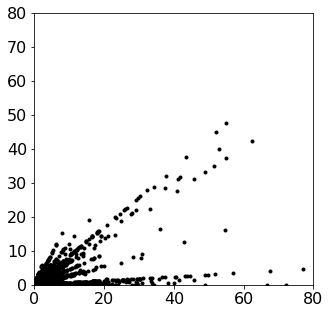

In [38]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(df2['OldBiomassC'],df2['NewBiomass'],'k.')
ax.set_xlim(0,80)
ax.set_ylim(0,80)

(0.0, 5.0)

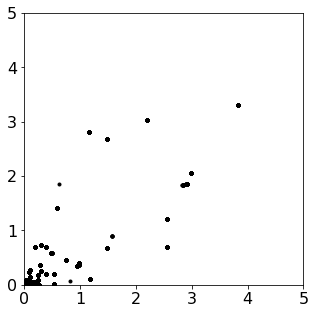

In [39]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(df2['OldIndBiomass'],df2['NewIndBiomass'],'k.')
ax.set_xlim(0,5)
ax.set_ylim(0,5)

In [40]:
df2.loc[df2['NewBiomass']>100,['Order','Species', 'PugetSound_LW_Regression', 'Function Name', 'c1', 'c2',
       'c3', 'c4', 'SoGLength', 'BiomassPerIndividual']]

,Order,Species,PugetSound_LW_Regression,Function Name,c1,c2,c3,c4,SoGLength,BiomassPerIndividual
17676,Euphausiacea,Thysanoessa raschii F,10^(3.174 * Log10([Length (mm)])-0.473),PugetSound2,3.17,0.47,1.00,1.00,22.60,6.68


### Start by creating a group of zooplankton taxa of interest

In [41]:
df['Order:'].unique()

array(['Diplostraca', 'Thecostraca', 'Amphipoda', 'Decapoda',
       'Euphausiacea', 'Calanoida', 'Cyclopoida', 'Poecilostomatoida',
       'Halocyprida', 'Aphragmophora', 'Copelata', 'Leptothecate',
       'Siphonophorae', 'Trachylina', 'Cydippida', nan, 'Pholadomyoida',
       'Neotaenioglossa', 'Thecosomata', 'Aciculata', 'Canalipalpata',
       'Osmeriformes', 'Perciformes', 'Beroida', 'Teuthida',
       'Gymnosomata', 'Isopoda', 'Siphonostomatoida', 'Anthoathecatae',
       'Scorpaeniformes', 'Phragmophora', 'Clupeiformes', 'Ophiurida',
       'Gadiformes', 'Semaeostomeae', 'Cumacea', 'Echinoida',
       'Harpacticoida', 'Pleuronectiformes', 'Tricladida', 'Myodocopida',
       'Phaeogromia', 'Noctilucales', 'Octopoda', 'Actiniaria',
       'Foraminiferida', 'Monstrilloida', 'Oligotrichida', 'Mysida',
       'Acariformes', 'Lophogastrida', 'Ophidiiformes',
       'Thalassocalycida', 'Doliolida', 'Lepadomorpha', 'Cephalaspidea',
       'Sygnathiformes'], dtype=object)

In [42]:
#Create a list using ALL orders that have been converted so that I can look at Total Biomass of all groups
colList=('Thecostraca', 'Amphipoda', 'Decapoda',
       'Euphausiacea', 'Calanoida','Halocyprida', 'Aphragmophora', 'Copelata', 'Leptothecate',
       'Siphonophorae', 'Cydippida', 'Canalipalpata','Clupeiformes')


In [43]:
df.keys()

Index(['Key', 'region_name', 'Station', 'PROJECT', 'lon', 'lat', 'Date',
       'STN_TIME', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Net_Mouth_Dia(m)',
       'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)', 'Volume Filtered(m3)',
       'CTD', 'NOTES', 'PI', 'Phylum:', 'Class:', 'Order:', 'Family:', 'Name',
       'Abundance(#/m3)', 'Biomass(mg/m3)', 'NumberOfSpecies',
       'Station Diversity', 'Station Equitability', 'dtUTC'],
      dtype='object')

In [44]:
df.loc[0]

Key                                                      IOS2012005000901
region_name                                    Northern Strait of Georgia
Station                                                                22
PROJECT                                                         Str. Geo.
lon                                                               -124.27
lat                                                                 49.67
Date                                                            6/14/2012
STN_TIME                                                             7:32
Twilight                                                         Daylight
Net_Type                                                         SCOR VNH
Mesh_Size(um)                                                         236
Net_Mouth_Dia(m)                                                     0.56
DEPTH_STRT1                                                            50
DEPTH_END1                            

In [45]:
towIDlist=['Key', 'region_name', 'Station',  'lon', 'lat','Date', 'dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)']

In [46]:
towIDlist2=['Key', 'region_name', 'Station',  'lon', 'lat', 'Date','dtUTC', 'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1', 'Bottom Depth(m)','CTD']

In [47]:
len(df.groupby(towIDlist)),len(df.groupby(towIDlist2)),len(df.groupby(['Key']))

(654, 12694, 654)

In [48]:
# Key is a unique identifier for each tow
# do not group by CTD due to NaN values

### Create a biomass dataframe

In [49]:
biomassDF=df.groupby(towIDlist,as_index=False).first()\
     .loc[:,towIDlist].copy(deep=True)

In [50]:
biomassDF

,Key,region_name,Station,lon,lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),DEPTH_STRT1,DEPTH_END1,Bottom Depth(m)
0,IOS2012005000901,Northern Strait of Georgia,22,-124.27,49.67,6/14/2012,2012-06-14 14:32:00,Daylight,SCOR VNH,236,50,0,352
1,IOS2012005001001,Northern Strait of Georgia,22,-124.27,49.67,6/14/2012,2012-06-14 14:52:00,Daylight,SCOR VNH,236,345,0,352
2,IOS2012005002101,Northern Strait of Georgia,11,-124.72,49.71,6/14/2012,2012-06-14 07:00:00,Night,SCOR VNH,236,50,0,307
3,IOS2012005002201,Northern Strait of Georgia,11,-124.72,49.71,6/14/2012,2012-06-14 07:05:00,Night,SCOR VNH,236,300,0,307
4,IOS2012005002901,Northern Strait of Georgia,CPF2,-124.50,49.47,6/15/2012,2012-06-15 10:00:00,Night,SCOR VNH,236,50,0,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,SOO2015095000101,Tidal Mixed,CLO-42,-123.34,48.39,4/27/2015,2015-04-27 17:37:00,Daylight,SCOR VNH,236,58,0,72
650,SOO2015095000401,Tidal Mixed,CB01,-123.32,48.34,4/30/2015,2015-04-30 19:00:00,Daylight,SCOR VNH,236,54,0,64
651,SOO2015095000501,Tidal Mixed,CLO-41,-123.34,48.40,7/9/2015,2015-07-09 19:25:00,Daylight,SCOR VNH,236,42,0,64
652,SOO2015095000701,Tidal Mixed,CB01,-123.32,48.34,7/27/2015,2015-07-27 19:06:00,Daylight,SCOR VNH,236,28,0,60


In [51]:
def getbiomassold(colname,key,origdf):        
    biomassArray=origdf.loc[(origdf.Key==key)&(origdf['Order:']==colname),
                    ['Biomass(mg/m3)']]
    biomass=np.nansum(biomassArray)
    
    return biomass

In [52]:
def getbiomassnew(colname,key,origdf):        
    biomassArray=origdf.loc[(origdf.Key==key)&(origdf['Order:']==colname),
                    ['NewBiomass']]
    biomass=np.nansum(biomassArray)
    
    return biomass

In [53]:
for icol in colList:
    biomassDF[icol+'_old']=[getbiomassold(icol,ikey,df2) for ikey in biomassDF['Key']]
    biomassDF[icol+'_new']=[getbiomassnew(icol,ikey,df2) for ikey in biomassDF['Key']]

In [54]:
biomassDF

,Key,region_name,Station,lon,lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,Leptothecate_old,Leptothecate_new,Siphonophorae_old,Siphonophorae_new,Cydippida_old,Cydippida_new,Canalipalpata_old,Canalipalpata_new,Clupeiformes_old,Clupeiformes_new
0,IOS2012005000901,Northern Strait of Georgia,22,-124.27,49.67,6/14/2012,2012-06-14 14:32:00,Daylight,SCOR VNH,236,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,IOS2012005001001,Northern Strait of Georgia,22,-124.27,49.67,6/14/2012,2012-06-14 14:52:00,Daylight,SCOR VNH,236,...,0.00,0.00,0.07,0.00,0.00,0.00,0.07,0.02,0.00,0.00
2,IOS2012005002101,Northern Strait of Georgia,11,-124.72,49.71,6/14/2012,2012-06-14 07:00:00,Night,SCOR VNH,236,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,IOS2012005002201,Northern Strait of Georgia,11,-124.72,49.71,6/14/2012,2012-06-14 07:05:00,Night,SCOR VNH,236,...,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,IOS2012005002901,Northern Strait of Georgia,CPF2,-124.50,49.47,6/15/2012,2012-06-15 10:00:00,Night,SCOR VNH,236,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,SOO2015095000101,Tidal Mixed,CLO-42,-123.34,48.39,4/27/2015,2015-04-27 17:37:00,Daylight,SCOR VNH,236,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
650,SOO2015095000401,Tidal Mixed,CB01,-123.32,48.34,4/30/2015,2015-04-30 19:00:00,Daylight,SCOR VNH,236,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.01
651,SOO2015095000501,Tidal Mixed,CLO-41,-123.34,48.40,7/9/2015,2015-07-09 19:25:00,Daylight,SCOR VNH,236,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
652,SOO2015095000701,Tidal Mixed,CB01,-123.32,48.34,7/27/2015,2015-07-27 19:06:00,Daylight,SCOR VNH,236,...,0.00,0.00,0.00,0.00,0.00,0.00,0.55,0.17,0.00,0.00


### Import model data for comparison with observations

In [55]:
import netCDF4 as nc

In [56]:
ftemp=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

In [57]:
ftemp.variables.keys()

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])

In [58]:
ftemp.variables['e3t_0']

<class 'netCDF4._netCDF4.Variable'>
float64 e3t_0(t, z, y, x)
    _FillValue: nan
    standard_name: e3t_0
    long_name: grid spacing on T-grid in w direction
    units: m
unlimited dimensions: t
current shape = (1, 40, 898, 398)
filling on

In [59]:
ftemp.variables['e3t_1d'][:]

masked_array(data=[[ 1.00000115,  1.00000501,  1.00001253,  1.00002718,
                     1.0000557 ,  1.00011125,  1.00021946,  1.0004302 ,
                     1.00084067,  1.00164012,  1.0031971 ,  1.00622914,
                     1.01213271,  1.02362358,  1.04597551,  1.08940061,
                     1.17356428,  1.33592899,  1.64636781,  2.22990285,
                     3.29248567,  5.11998508,  7.97451506, 11.8252972 ,
                    16.10792044, 19.95870258, 22.81323256, 24.64073198,
                    25.70331479, 26.28684983, 26.59728865, 26.75965336,
                    26.84381704, 26.88724213, 26.90959407, 26.92108493,
                    26.9269885 , 26.93002054, 26.93157752, 26.93237697]],
             mask=False,
       fill_value=1e+20)

In [60]:
fdict={'ptrc_T':1,'grid_T':1}
start_date = dt.datetime(2012,1,1)
end_date = dt.datetime(2015,12,31)
flen=1 # number of days per model output file. always 1 for 201905 and 201812 model runs
namfmt='nowcast' # for 201905 and 201812 model runs, this should always be 'nowcast'
# filemap is dictionary of the form variableName: fileType, where variableName is the name
# of the variable you want to extract and fileType designates the type of 
# model output file it can be found in (usually ptrc_T for biology, grid_T for temperature and 
# salinity)
filemap={'microzooplankton':'ptrc_T','mesozooplankton':'ptrc_T'}
# fdict is a dictionary mappy file type to its time resolution. Here, 1 means hourly output
# (1h file) and 24 means daily output (1d file). In certain runs, multiple time resolutions 
# are available
fdict={'ptrc_T':1,'grid_T':1}

In [61]:
PATH= '/results2/SalishSea/nowcast-green.201905/'

In [62]:
#renaming columns to match with model columns
biomassDF.rename(columns={'lon':'Lon','lat':'Lat'},inplace=True) 

In [63]:
biomassDF.keys()

Index(['Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Twilight', 'Net_Type', 'Mesh_Size(um)', 'DEPTH_STRT1', 'DEPTH_END1',
       'Bottom Depth(m)', 'Thecostraca_old', 'Thecostraca_new',
       'Amphipoda_old', 'Amphipoda_new', 'Decapoda_old', 'Decapoda_new',
       'Euphausiacea_old', 'Euphausiacea_new', 'Calanoida_old',
       'Calanoida_new', 'Halocyprida_old', 'Halocyprida_new',
       'Aphragmophora_old', 'Aphragmophora_new', 'Copelata_old',
       'Copelata_new', 'Leptothecate_old', 'Leptothecate_new',
       'Siphonophorae_old', 'Siphonophorae_new', 'Cydippida_old',
       'Cydippida_new', 'Canalipalpata_old', 'Canalipalpata_new',
       'Clupeiformes_old', 'Clupeiformes_new'],
      dtype='object')

In [64]:
#rename columns
biomassDF.rename(columns={'DEPTH_STRT1':'Z_lower','DEPTH_END1':'Z_upper'},inplace=True)

In [65]:
#create new columns
biomassDF['Year']=[ii.year for ii in biomassDF['dtUTC']]
biomassDF['Month']=[ii.month for ii in biomassDF['dtUTC']]
biomassDF['YD']=et.datetimeToYD(biomassDF['dtUTC'])

#### Create groups to compare with model outputs

In [88]:
#old data needs C conversion unless you are using 'OldBiomassC'
biomassDF['TotalOld']=((biomassDF['Thecostraca_old']+biomassDF['Amphipoda_old']+\
                    biomassDF['Decapoda_old']+biomassDF['Euphausiacea_old']+\
                    biomassDF['Calanoida_old']+\
                    biomassDF['Halocyprida_old']+biomassDF['Aphragmophora_old']+biomassDF['Copelata_old']+\
                   biomassDF['Leptothecate_old']+biomassDF['Siphonophorae_old']+biomassDF['Cydippida_old']+\
                   biomassDF['Cydippida_old']+biomassDF['Canalipalpata_old']+biomassDF['Clupeiformes_old'])*0.45)

In [89]:
#new data do not need C conversion
biomassDF['TotalNew']=(biomassDF['Thecostraca_new']+biomassDF['Amphipoda_new']+\
                    biomassDF['Decapoda_new']+biomassDF['Euphausiacea_new']+\
                    biomassDF['Calanoida_new']+\
                    biomassDF['Halocyprida_new']+biomassDF['Aphragmophora_new']+biomassDF['Copelata_new']+\
                   biomassDF['Leptothecate_new']+biomassDF['Siphonophorae_new']+biomassDF['Cydippida_new']+\
                   biomassDF['Cydippida_new']+biomassDF['Canalipalpata_new']+biomassDF['Clupeiformes_new'])

In [90]:
#Create column of the Main Groups based on biomass-dominant species
biomassDF['MainGroupsOld']=((biomassDF['Amphipoda_old']+\
                    biomassDF['Decapoda_old']+biomassDF['Euphausiacea_old']+\
                    biomassDF['Calanoida_old']+biomassDF['Copelata_old']+biomassDF['Aphragmophora_old'])*0.45)

In [91]:
biomassDF['MainGroupsNew']=(biomassDF['Amphipoda_new']+\
                    biomassDF['Decapoda_new']+biomassDF['Euphausiacea_new']+\
                    biomassDF['Calanoida_new']+biomassDF['Copelata_new']+biomassDF['Aphragmophora_new'])



In [92]:
#Create columns for specific groups of interest using slightly diff names to avoid overwriting original columns
biomassDF['AmphipodsOld']=biomassDF['Amphipoda_old']*0.45
biomassDF['DecapodsOld']=biomassDF['Decapoda_old']*0.45
biomassDF['EuphausiidsOld']=biomassDF['Euphausiacea_old']*0.45
biomassDF['CalanoidsOld']=biomassDF['Calanoida_old']*0.45
biomassDF['LarvaceansOld']=biomassDF['Copelata_old']*0.45
biomassDF['ChaetognathsOld']=biomassDF['Aphragmophora_old']*0.45

biomassDF['AmphipodsNew']=biomassDF['Amphipoda_new']
biomassDF['DecapodsNew']=biomassDF['Decapoda_new']
biomassDF['EuphausiidsNew']=biomassDF['Euphausiacea_new']
biomassDF['CalanoidsNew']=biomassDF['Calanoida_new']
biomassDF['LarvaceansNew']=biomassDF['Copelata_new']
biomassDF['ChaetognathsNew']=biomassDF['Aphragmophora_new']

In [93]:
biomassDF2013=biomassDF[biomassDF.Year==2013]

In [94]:
biomassDF2013

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,AmphipodsNew,DecapodsNew,EuphausiidsNew,CalanoidsNew,LarvaceansNew,ChaetognathsNew,TotalOld,TotalNew,MainGroupsOld,MainGroupsNew
54,IOS2013012001701,Central Strait of Georgia,41,-123.37,49.05,4/11/2013,2013-04-11 12:39:00,Daylight,SCOR VNH,236,...,1.12,0.00,4.90,75.91,0.00,0.00,140.78,81.96,140.34,81.93
55,IOS2013012001801,Central Strait of Georgia,41,-123.39,49.05,4/11/2013,2013-04-11 13:05:00,Daylight,SCOR VNH,236,...,0.27,0.00,1.04,19.95,0.00,0.18,44.94,21.45,44.50,21.43
56,IOS2013012002501,Central Strait of Georgia,CPF1,-124.09,49.37,4/11/2013,2013-04-11 21:47:00,Daylight,SCOR VNH,236,...,1.09,0.00,1.75,21.39,0.00,0.00,44.71,25.04,40.43,24.23
57,IOS2013012002601,Central Strait of Georgia,CPF1,-124.09,49.37,4/11/2013,2013-04-11 22:02:00,Daylight,SCOR VNH,236,...,1.65,0.00,0.17,6.58,0.00,0.07,17.22,8.61,16.69,8.47
58,IOS2013012003101,Northern Strait of Georgia,CPF2,-124.50,49.47,4/11/2013,2013-04-12 02:13:00,Daylight,SCOR VNH,236,...,1.65,0.00,1.25,12.21,0.00,0.14,28.82,15.51,24.57,15.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,PBS2013043000401,Central Strait of Georgia,GS01,-123.40,48.94,6/26/2013,2013-06-26 16:38:00,Daylight,Bongo VNH,253,...,4.29,0.00,17.11,3.46,0.00,2.79,40.98,27.66,40.58,27.64
493,PBS2013043005701,Northern Strait of Georgia,GS11,-124.57,49.48,6/30/2013,2013-06-30 14:06:00,Daylight,Bongo VNH,253,...,4.19,0.00,15.01,5.89,0.00,0.05,33.55,25.14,33.55,25.14
494,PBS2013045000201,Central Strait of Georgia,CPF1,-124.08,49.37,6/25/2013,2013-06-25 16:31:00,Daylight,Bongo VNH,253,...,1.87,0.00,2.31,2.30,0.00,0.45,10.43,6.93,10.25,6.92
495,PBS2013045000401,Central Strait of Georgia,GEO1,-123.75,49.25,6/25/2013,2013-06-25 19:20:00,Daylight,Bongo VNH,253,...,1.86,0.00,1.13,3.58,0.00,0.41,15.12,6.98,15.03,6.98


Text(0.5, 1.0, 'Calanoid Copepods')

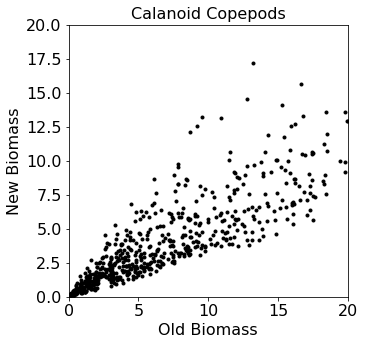

In [95]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(biomassDF['CalanoidsOld'],biomassDF['CalanoidsNew'],'k.')
ax.set_xlim(0,20)
ax.set_ylim(0,20)
ax.set_xlabel('Old Biomass')
ax.set_ylabel('New Biomass')
ax.set_title('Calanoid Copepods')

Text(0.5, 1.0, 'Euphausiids')

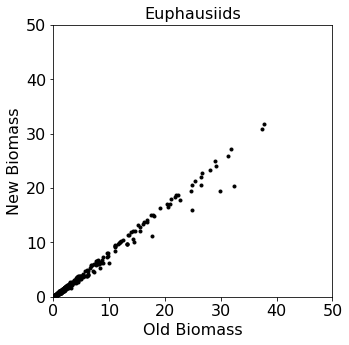

In [96]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(biomassDF['EuphausiidsOld'],biomassDF['EuphausiidsNew'],'k.')
ax.set_xlim(0,50)
ax.set_ylim(0,50)
ax.set_xlabel('Old Biomass')
ax.set_ylabel('New Biomass')
ax.set_title('Euphausiids')

Text(0.5, 1.0, 'Amphipods')

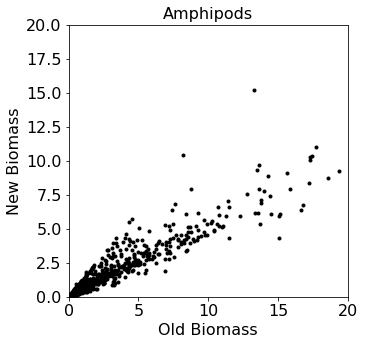

In [97]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(biomassDF['AmphipodsOld'],biomassDF['AmphipodsNew'],'k.')
ax.set_xlim(0,20)
ax.set_ylim(0,20)
ax.set_xlabel('Old Biomass')
ax.set_ylabel('New Biomass')
ax.set_title('Amphipods')

Text(0.5, 1.0, 'Decapods')

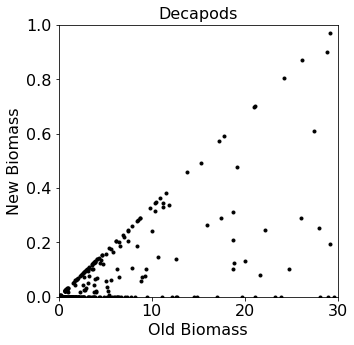

In [98]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(biomassDF['DecapodsOld'],biomassDF['DecapodsNew'],'k.')
ax.set_xlim(0,30)
ax.set_ylim(0,1)
ax.set_xlabel('Old Biomass')
ax.set_ylabel('New Biomass')
ax.set_title('Decapods')

Text(0.5, 1.0, 'Larvaceans')

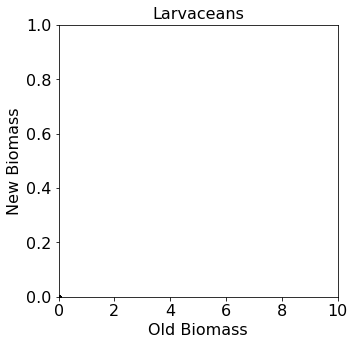

In [99]:
#Clearly there is something wrong with the Oikopleura conversions; removed from conversion file for now but needs to be fixed.
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(biomassDF['LarvaceansOld'],biomassDF['LarvaceansNew'],'k.')
ax.set_xlim(0,10)
ax.set_ylim(0,1)
ax.set_xlabel('Old Biomass')
ax.set_ylabel('New Biomass')
ax.set_title('Larvaceans')

Text(0.5, 1.0, 'Chaetognaths')

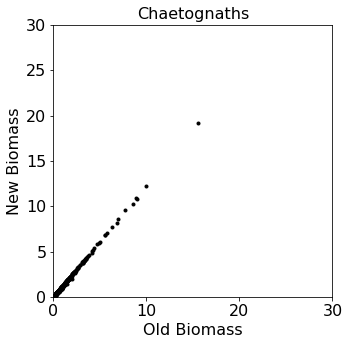

In [100]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(biomassDF['ChaetognathsOld'],biomassDF['ChaetognathsNew'],'k.')
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.set_xlabel('Old Biomass')
ax.set_ylabel('New Biomass')
ax.set_title('Chaetognaths')

In [101]:
#Match observation data with model output
##Error warning is fine as long as the difference between seafloor value is <3ish
data=et.matchData(biomassDF,filemap,fdict,start_date,end_date,'nowcast',PATH,1,quiet=False,method='vertNet');

In [107]:
data

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,L10AmphipodsNew,L10DecapodsNew,L10EuphausiidsNew,L10CalanoidsNew,L10LarvaceansNew,L10TotalNew,L10MainGroupsNew,L10mod_mesozooplankton,L10mod_microzooplankton,L10mod_allzooplankton
0,IOS2012025013601,Northern Strait of Georgia,CPF2,-124.50,49.47,5/21/2012,2012-05-21 12:26:00,Daylight,Bongo VNH,236,...,0.60,-3.00,1.82,1.54,-3.00,1.78,1.78,1.17,0.96,1.38
1,IOS2012025013701,Northern Strait of Georgia,CPF2,-124.50,49.47,5/21/2012,2012-05-21 12:43:00,Daylight,MPS VNH,200,...,1.11,-3.00,-0.48,1.67,-3.00,1.78,1.78,0.37,-1.52,0.38
2,IOS2012025013702,Northern Strait of Georgia,CPF2,-124.50,49.47,5/21/2012,2012-05-21 12:45:00,Daylight,MPS VNH,200,...,0.35,-3.00,0.23,1.63,-3.00,1.67,1.66,0.61,-0.90,0.62
3,IOS2012025013703,Northern Strait of Georgia,CPF2,-124.50,49.47,5/21/2012,2012-05-21 12:47:00,Daylight,MPS VNH,200,...,0.47,-3.00,-0.47,0.43,-3.00,0.78,0.78,0.84,0.06,0.91
4,IOS2012025013704,Northern Strait of Georgia,CPF2,-124.50,49.47,5/21/2012,2012-05-21 12:56:00,Daylight,MPS VNH,200,...,-0.04,-3.00,1.79,0.64,-3.00,1.44,1.44,1.26,0.79,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,PSF2015097005001,Northern Strait of Georgia,IS-3,-124.29,49.66,10/5/2015,2015-10-05 18:43:00,Daylight,Ring VNH,250,...,0.05,-3.00,-0.09,0.03,-3.00,0.48,0.48,1.46,0.60,1.52
650,PSF2015098005701,Northern Strait of Georgia,BS-3,-124.67,49.69,10/5/2015,2015-10-05 19:15:00,Daylight,Ring VNH,250,...,0.41,-3.00,1.47,0.75,-3.00,1.29,1.29,1.43,0.60,1.49
651,PSF2015098005801,Baynes Sound,BS-1,-124.87,49.61,10/5/2015,2015-10-05 20:38:00,Daylight,Ring VNH,250,...,-1.64,-3.00,-3.00,0.54,-3.00,1.56,0.56,1.92,1.12,1.98
652,PSF2015097005101,Nearshore-North East,IS-2,-124.08,49.64,10/5/2015,2015-10-05 20:40:00,Daylight,Ring VNH,250,...,0.64,-3.00,-3.00,0.34,-3.00,0.82,0.81,1.86,1.04,1.92


In [108]:
data.keys()

Index(['Key', 'region_name', 'Station', 'Lon', 'Lat', 'Date', 'dtUTC',
       'Twilight', 'Net_Type', 'Mesh_Size(um)', 'Z_lower', 'Z_upper',
       'Bottom Depth(m)', 'Thecostraca_old', 'Thecostraca_new',
       'Amphipoda_old', 'Amphipoda_new', 'Decapoda_old', 'Decapoda_new',
       'Euphausiacea_old', 'Euphausiacea_new', 'Calanoida_old',
       'Calanoida_new', 'Halocyprida_old', 'Halocyprida_new',
       'Aphragmophora_old', 'Aphragmophora_new', 'Copelata_old',
       'Copelata_new', 'Leptothecate_old', 'Leptothecate_new',
       'Siphonophorae_old', 'Siphonophorae_new', 'Cydippida_old',
       'Cydippida_new', 'Canalipalpata_old', 'Canalipalpata_new',
       'Clupeiformes_old', 'Clupeiformes_new', 'Year', 'Month', 'YD',
       'AmphipodsOld', 'DecapodsOld', 'EuphausiidsOld', 'CalanoidsOld',
       'LarvaceansOld', 'ChaetognathsOld', 'AmphipodsNew', 'DecapodsNew',
       'EuphausiidsNew', 'CalanoidsNew', 'LarvaceansNew', 'ChaetognathsNew',
       'TotalOld', 'TotalNew', 'MainGroupsO

In [109]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

In [110]:
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

In [111]:
#create columns for log10 +0.001 transformed zooplankton
data['L10AmphipodsOld']=logt(data['AmphipodsOld'])
data['L10DecapodsOld']=logt(data['DecapodsOld'])
data['L10EuphausiidsOld']=logt(data['EuphausiidsOld']*3) #multiply by 3 to correct for net avoidance
data['L10CalanoidsOld']=logt(data['CalanoidsOld'])
data['L10LarvaceansOld']=logt(data['LarvaceansOld'])
data['L10TotalOld']=logt(data['TotalOld'])
data['L10MainGroupsOld']=logt(data['MainGroupsOld'])

data['L10AmphipodsNew']=logt(data['AmphipodsNew'])
data['L10DecapodsNew']=logt(data['DecapodsNew'])
data['L10EuphausiidsNew']=logt(data['EuphausiidsNew']*3) #multiply by 3 to correct for net avoidance
data['L10CalanoidsNew']=logt(data['CalanoidsNew'])
data['L10LarvaceansNew']=logt(data['LarvaceansNew'])
data['L10TotalNew']=logt(data['TotalNew'])
data['L10MainGroupsNew']=logt(data['MainGroupsNew'])

#Convert model values to mg C m-3 by multiplying value * C:N of 5.7 * molecular weight of C (12)
data['L10mod_mesozooplankton']=logt(data['mod_mesozooplankton']*5.7*12)
data['L10mod_microzooplankton']=logt(data['mod_microzooplankton']*5.7*12)

data['L10mod_allzooplankton']=logt((data['mod_mesozooplankton']+data['mod_microzooplankton'])*5.7*12)

In [112]:
#look at data for individual years
View2012=data.loc[data.Year==2012]
View2013=data.loc[data.Year==2013]
View2014=data.loc[data.Year==2014]
View2015=data.loc[data.Year==2015]


In [113]:
#look at data for a specific region
ViewCentralSoG=data.loc[data.region_name=='Central Strait of Georgia']
ViewNorthernSoG=data.loc[data.region_name=='Northern Strait of Georgia']
ViewSouthernSoG=data.loc[data.region_name=='Southern Strait of Georgia']
ViewBaynes=data.loc[data.region_name=='Baynes Sound']
ViewTidalMixed=data.loc[data.region_name=='Tidal Mixed']
ViewNearshoreNE=data.loc[data.region_name=='Nearshore-North East']
ViewGulfIslands=data.loc[data.region_name=='Gulf Islands']

In [114]:
#look at data for an individual station
ViewGEO1=data.loc[data.Station=='GEO1']

In [115]:
View2015

,Key,region_name,Station,Lon,Lat,Date,dtUTC,Twilight,Net_Type,Mesh_Size(um),...,L10AmphipodsNew,L10DecapodsNew,L10EuphausiidsNew,L10CalanoidsNew,L10LarvaceansNew,L10TotalNew,L10MainGroupsNew,L10mod_mesozooplankton,L10mod_microzooplankton,L10mod_allzooplankton
310,IOS2015001000201A,Tidal Mixed,59,-123.25,48.61,2/10/2015,2015-02-11 05:06:00,Night,Bongo VNH,236,...,-0.64,-3.00,-0.26,0.34,-3.00,0.65,0.65,1.23,0.30,1.28
311,IOS2015001000701A,Juan de Fuca,JF02,-124.00,48.30,2/11/2015,2015-02-11 12:09:00,Night,Bongo VNH,236,...,-1.38,-3.00,-0.06,-0.54,-3.00,0.39,0.37,1.04,-0.23,1.07
312,IOS2015099000101,Northern Strait of Georgia,GEO_STR,-124.09,49.58,2/13/2015,2015-02-14 04:03:00,Night,SCOR VNH,236,...,0.09,-3.00,0.10,0.28,-3.00,0.62,0.62,0.91,0.22,0.99
313,IOS2015099000201,Central Strait of Georgia,GEO1,-123.75,49.25,2/15/2015,2015-02-15 09:22:00,Night,SCOR VNH,236,...,0.27,-3.00,1.03,0.29,-3.00,0.90,0.90,0.86,0.12,0.93
314,IOS2015099000301,Northern Strait of Georgia,11,-124.72,49.70,2/15/2015,2015-02-15 14:36:00,Daylight,SCOR VNH,236,...,0.13,-3.00,0.03,0.19,-3.00,0.56,0.55,0.83,0.22,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,PSF2015097005001,Northern Strait of Georgia,IS-3,-124.29,49.66,10/5/2015,2015-10-05 18:43:00,Daylight,Ring VNH,250,...,0.05,-3.00,-0.09,0.03,-3.00,0.48,0.48,1.46,0.60,1.52
650,PSF2015098005701,Northern Strait of Georgia,BS-3,-124.67,49.69,10/5/2015,2015-10-05 19:15:00,Daylight,Ring VNH,250,...,0.41,-3.00,1.47,0.75,-3.00,1.29,1.29,1.43,0.60,1.49
651,PSF2015098005801,Baynes Sound,BS-1,-124.87,49.61,10/5/2015,2015-10-05 20:38:00,Daylight,Ring VNH,250,...,-1.64,-3.00,-3.00,0.54,-3.00,1.56,0.56,1.92,1.12,1.98
652,PSF2015097005101,Nearshore-North East,IS-2,-124.08,49.64,10/5/2015,2015-10-05 20:40:00,Daylight,Ring VNH,250,...,0.64,-3.00,-3.00,0.34,-3.00,0.82,0.81,1.86,1.04,1.92


### Calculate Mean and SEMs

In [116]:
#monthly mean and SEM for entire SoG
monthlymean=data.groupby(['Month']).mean()

In [117]:
monthlysem=data.groupby(['Month']).sem()

In [118]:
#monthly mean and SoG regions Only
monthlymeanCentral=ViewCentralSoG.groupby(['Month']).mean()
monthlymeanBaynes=ViewBaynes.groupby(['Month']).mean()
monthlymeanNorthern=ViewNorthernSoG.groupby(['Month']).mean()
monthlymeanSouthern=ViewSouthernSoG.groupby(['Month']).mean()
monthlymeanTidal=ViewTidalMixed.groupby(['Month']).mean()
monthlymeanNearshoreNE=ViewNearshoreNE.groupby(['Month']).mean()
monthlymeanGulfIslands=ViewGulfIslands.groupby(['Month']).mean()




In [119]:
monthlysemCentral=ViewCentralSoG.groupby(['Month']).sem()

In [120]:
#monthly mean and SEM for station GEO1 only
monthlymeanGEO1=ViewGEO1.groupby(['Month']).mean()


In [121]:
monthlysemGEO1=ViewGEO1.groupby(['Month']).sem()

In [122]:
monthlymean2012=View2012.groupby(['Month']).mean()
monthlymean2013=View2013.groupby(['Month']).mean()
monthlymean2014=View2014.groupby(['Month']).mean()
monthlymean2015=View2015.groupby(['Month']).mean()

In [123]:
monthlysem2012=View2012.groupby(['Month']).sem()
monthlysem2013=View2013.groupby(['Month']).sem()
monthlysem2014=View2014.groupby(['Month']).sem()
monthlysem2015=View2015.groupby(['Month']).sem()

## Figure showing observation locations of IOS zooplankton sampling

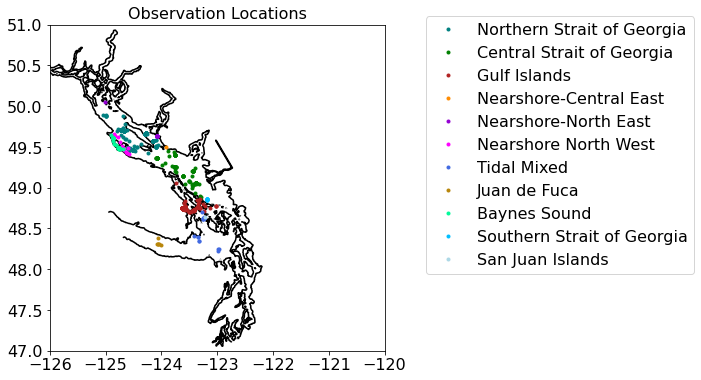

In [124]:


fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1)
colors=('teal','green','firebrick','darkorange','darkviolet','fuchsia',
        'royalblue','darkgoldenrod','mediumspringgreen','deepskyblue','lightblue')
datreg=dict()
for ind, iregion in enumerate(data.region_name.unique()):
    datreg[iregion] = data.loc[data.region_name==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47,51)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -120);
ax.set_title('Observation Locations');
ax.legend(bbox_to_anchor=(1.1, 1.05))


### Plot biomass of individual groups for entire Strait of Georgia

(0.0, 2.0)

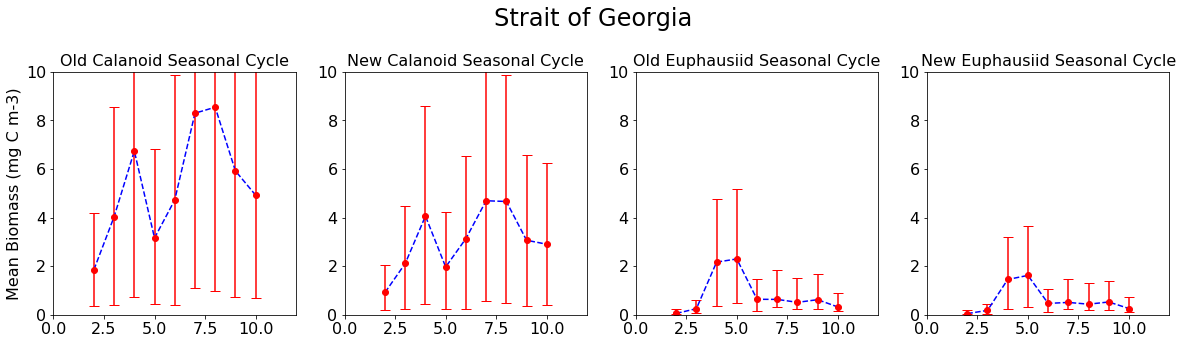

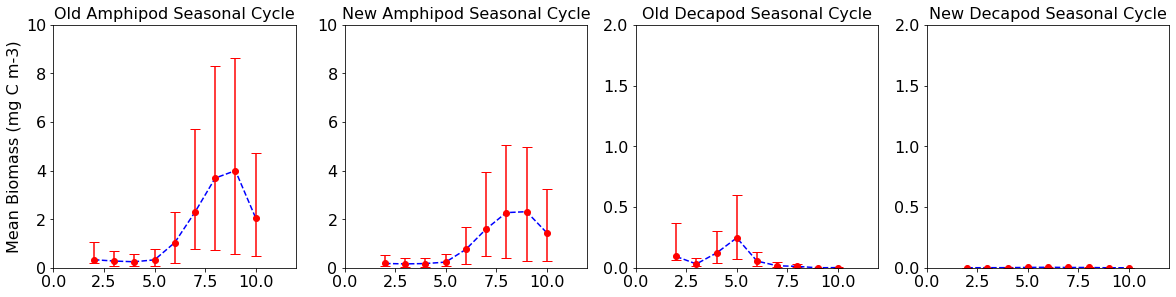

In [125]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
fig.suptitle('Strait of Georgia', fontsize=24)
fig.subplots_adjust(top=0.8)
ax[0].errorbar(monthlymean.index,logt_inv(monthlymean['L10CalanoidsOld']),
               yerr=logt_inv(np.array([monthlymean['L10CalanoidsOld']-monthlysem['L10CalanoidsOld'],
                 monthlymean['L10CalanoidsOld']+monthlysem['L10CalanoidsOld']])),
               fmt='ro',capsize=5)
ax[0].plot(logt_inv(monthlymean['L10CalanoidsOld']),'b--')
ax[1].errorbar(monthlymean.index,logt_inv(monthlymean['L10CalanoidsNew']),
               yerr=logt_inv(np.array([monthlymean['L10CalanoidsNew']-monthlysem['L10CalanoidsNew'],
                 monthlymean['L10CalanoidsNew']+monthlysem['L10CalanoidsNew']])),
               fmt='ro',capsize=5)
ax[1].plot(logt_inv(monthlymean['L10CalanoidsNew']),'b--')
ax[2].errorbar(monthlymean.index,logt_inv(monthlymean['L10EuphausiidsOld']),
               yerr=logt_inv(np.array([monthlymean['L10EuphausiidsOld']-monthlysem['L10EuphausiidsOld'],
                 monthlymean['L10EuphausiidsOld']+monthlysem['L10EuphausiidsOld']])),
               fmt='ro',capsize=5)
ax[2].plot(logt_inv(monthlymean['L10EuphausiidsOld']),'b--')
ax[3].errorbar(monthlymean.index,logt_inv(monthlymean['L10EuphausiidsNew']),
               yerr=logt_inv(np.array([monthlymean['L10EuphausiidsNew']-monthlysem['L10EuphausiidsNew'],
                 monthlymean['L10EuphausiidsNew']+monthlysem['L10EuphausiidsNew']])),
               fmt='ro',capsize=5)
ax[3].plot(logt_inv(monthlymean['L10EuphausiidsNew']),'b--')
ax[0].set_title('Old Calanoid Seasonal Cycle')
ax[1].set_title('New Calanoid Seasonal Cycle')
ax[2].set_title('Old Euphausiid Seasonal Cycle')
ax[3].set_title('New Euphausiid Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass (mg C m-3)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[3].set_xlim(0,12)
ax[0].set_ylim(0,10)
ax[1].set_ylim(0,10)
ax[2].set_ylim(0,10)
ax[3].set_ylim(0,10)

fig,ax=plt.subplots(1,4,figsize=(20,5))
fig.subplots_adjust(top=0.8)
ax[0].errorbar(monthlymean.index,logt_inv(monthlymean['L10AmphipodsOld']),
               yerr=logt_inv(np.array([monthlymean['L10AmphipodsOld']-monthlysem['L10AmphipodsOld'],
                 monthlymean['L10AmphipodsOld']+monthlysem['L10AmphipodsOld']])),
               fmt='ro',capsize=5)
ax[0].plot(logt_inv(monthlymean['L10AmphipodsOld']),'b--')
ax[1].errorbar(monthlymean.index,logt_inv(monthlymean['L10AmphipodsNew']),
               yerr=logt_inv(np.array([monthlymean['L10AmphipodsNew']-monthlysem['L10AmphipodsNew'],
                 monthlymean['L10AmphipodsNew']+monthlysem['L10AmphipodsNew']])),
               fmt='ro',capsize=5)
ax[1].plot(logt_inv(monthlymean['L10AmphipodsNew']),'b--')
ax[2].errorbar(monthlymean.index,logt_inv(monthlymean['L10DecapodsOld']),
               yerr=logt_inv(np.array([monthlymean['L10DecapodsOld']-monthlysem['L10DecapodsOld'],
                 monthlymean['L10DecapodsOld']+monthlysem['L10DecapodsOld']])),
               fmt='ro',capsize=5)
ax[2].plot(logt_inv(monthlymean['L10DecapodsOld']),'b--')
ax[3].errorbar(monthlymean.index,logt_inv(monthlymean['L10DecapodsNew']),
               yerr=logt_inv(np.array([monthlymean['L10DecapodsNew']-monthlysem['L10DecapodsNew'],
                 monthlymean['L10DecapodsNew']+monthlysem['L10DecapodsNew']])),
               fmt='ro',capsize=5)
ax[3].plot(logt_inv(monthlymean['L10DecapodsNew']),'b--')
ax[0].set_title('Old Amphipod Seasonal Cycle')
ax[1].set_title('New Amphipod Seasonal Cycle')
ax[2].set_title('Old Decapod Seasonal Cycle')
ax[3].set_title('New Decapod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass (mg C m-3)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[3].set_xlim(0,12)
ax[0].set_ylim(0,10)
ax[1].set_ylim(0,10)
ax[2].set_ylim(0,2)
ax[3].set_ylim(0,2)


### Plot biomass of individual groups for Central Strait of Georgia

(0.0, 2.0)

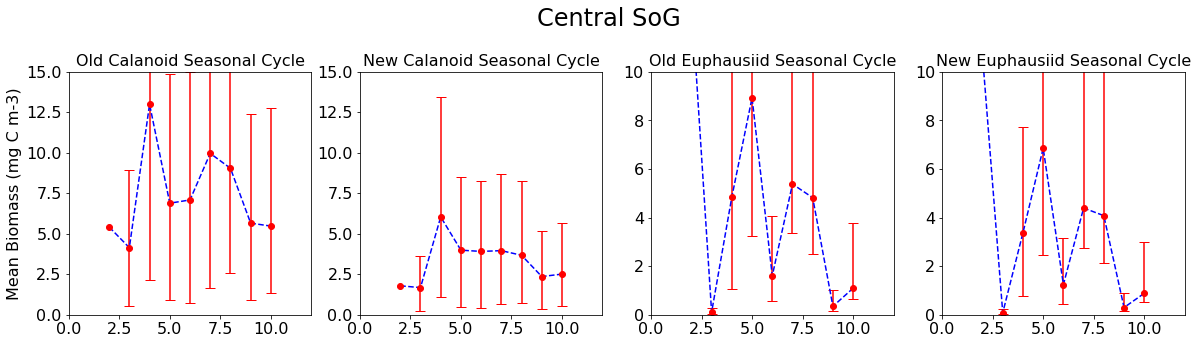

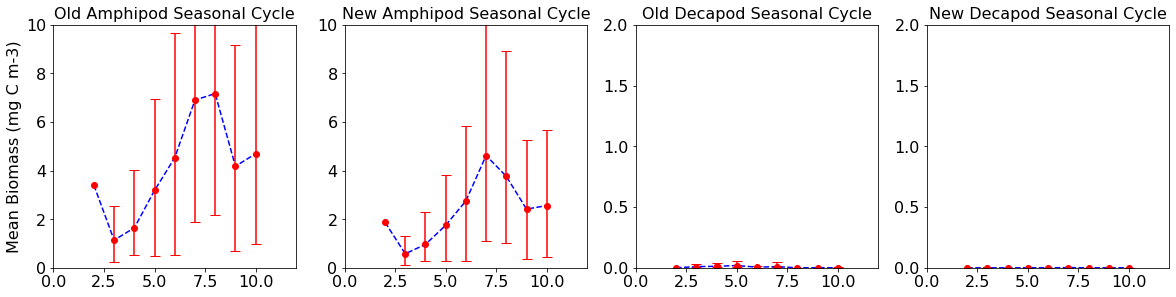

In [130]:
fig,ax=plt.subplots(1,4,figsize=(20,5))
fig.suptitle('Central SoG', fontsize=24)
fig.subplots_adjust(top=0.8)
ax[0].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10CalanoidsOld']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10CalanoidsOld']-monthlysemCentral['L10CalanoidsOld'],
                 monthlymeanCentral['L10CalanoidsOld']+monthlysemCentral['L10CalanoidsOld']])),
               fmt='ro',capsize=5)
ax[0].plot(logt_inv(monthlymeanCentral['L10CalanoidsOld']),'b--')
ax[1].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10CalanoidsNew']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10CalanoidsNew']-monthlysemCentral['L10CalanoidsNew'],
                 monthlymeanCentral['L10CalanoidsNew']+monthlysemCentral['L10CalanoidsNew']])),
               fmt='ro',capsize=5)
ax[1].plot(logt_inv(monthlymeanCentral['L10CalanoidsNew']),'b--')
ax[2].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10EuphausiidsOld']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10EuphausiidsOld']-monthlysemCentral['L10EuphausiidsOld'],
                 monthlymeanCentral['L10EuphausiidsOld']+monthlysemCentral['L10EuphausiidsOld']])),
               fmt='ro',capsize=5)
ax[2].plot(logt_inv(monthlymeanCentral['L10EuphausiidsOld']),'b--')
ax[3].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10EuphausiidsNew']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10EuphausiidsNew']-monthlysemCentral['L10EuphausiidsNew'],
                 monthlymeanCentral['L10EuphausiidsNew']+monthlysemCentral['L10EuphausiidsNew']])),
               fmt='ro',capsize=5)
ax[3].plot(logt_inv(monthlymeanCentral['L10EuphausiidsNew']),'b--')
ax[0].set_title('Old Calanoid Seasonal Cycle')
ax[1].set_title('New Calanoid Seasonal Cycle')
ax[2].set_title('Old Euphausiid Seasonal Cycle')
ax[3].set_title('New Euphausiid Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass (mg C m-3)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[3].set_xlim(0,12)
ax[0].set_ylim(0,15)
ax[1].set_ylim(0,15)
ax[2].set_ylim(0,10)
ax[3].set_ylim(0,10)

fig,ax=plt.subplots(1,4,figsize=(20,5))
fig.subplots_adjust(top=0.8)
ax[0].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10AmphipodsOld']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10AmphipodsOld']-monthlysemCentral['L10AmphipodsOld'],
                 monthlymeanCentral['L10AmphipodsOld']+monthlysemCentral['L10AmphipodsOld']])),
               fmt='ro',capsize=5)
ax[0].plot(logt_inv(monthlymeanCentral['L10AmphipodsOld']),'b--')
ax[1].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10AmphipodsNew']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10AmphipodsNew']-monthlysemCentral['L10AmphipodsNew'],
                 monthlymeanCentral['L10AmphipodsNew']+monthlysemCentral['L10AmphipodsNew']])),
               fmt='ro',capsize=5)
ax[1].plot(logt_inv(monthlymeanCentral['L10AmphipodsNew']),'b--')
ax[2].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10DecapodsOld']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10DecapodsOld']-monthlysemCentral['L10DecapodsOld'],
                 monthlymeanCentral['L10DecapodsOld']+monthlysemCentral['L10DecapodsOld']])),
               fmt='ro',capsize=5)
ax[2].plot(logt_inv(monthlymeanCentral['L10DecapodsOld']),'b--')
ax[3].errorbar(monthlymeanCentral.index,logt_inv(monthlymeanCentral['L10DecapodsNew']),
               yerr=logt_inv(np.array([monthlymeanCentral['L10DecapodsNew']-monthlysemCentral['L10DecapodsNew'],
                 monthlymeanCentral['L10DecapodsNew']+monthlysemCentral['L10DecapodsNew']])),
               fmt='ro',capsize=5)
ax[3].plot(logt_inv(monthlymeanCentral['L10DecapodsNew']),'b--')
ax[0].set_title('Old Amphipod Seasonal Cycle')
ax[1].set_title('New Amphipod Seasonal Cycle')
ax[2].set_title('Old Decapod Seasonal Cycle')
ax[3].set_title('New Decapod Seasonal Cycle')
ax[0].set_ylabel('Mean Biomass (mg C m-3)')
ax[0].set_xlim(0,12)
ax[1].set_xlim(0,12)
ax[2].set_xlim(0,12)
ax[3].set_xlim(0,12)
ax[0].set_ylim(0,10)
ax[1].set_ylim(0,10)
ax[2].set_ylim(0,2)
ax[3].set_ylim(0,2)


### Plot seasonal cycles of Model vs Obs for different regions in Strait of Georgia

Text(0, 0.5, 'Mean Biomass (mg C m-3)')

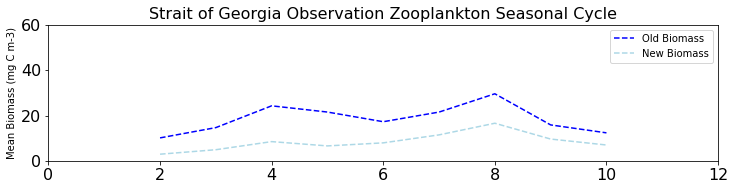

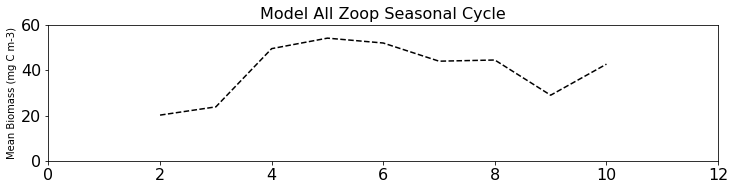

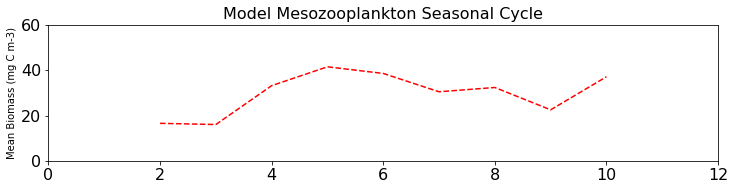

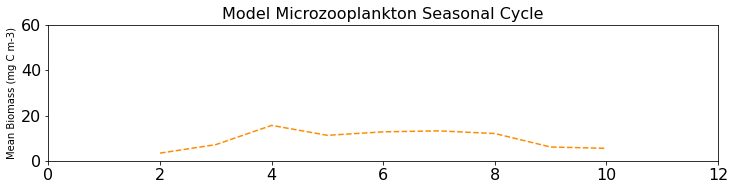

In [131]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10TotalOld']),'--',color='blue',label='Old Biomass')
ax.plot(logt_inv(monthlymean['L10TotalNew']),'--',color='lightblue',label='New Biomass')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Strait of Georgia Observation Zooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10mod_allzooplankton']),'--',color='black',label='Model Zoop')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Model All Zoop Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

Text(0, 0.5, 'Mean Biomass (mg C m-3)')

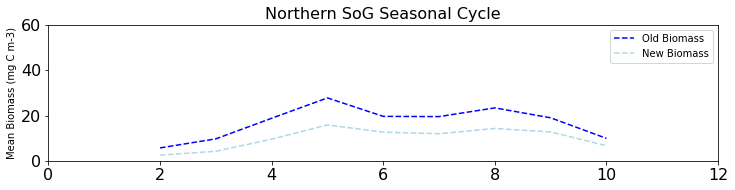

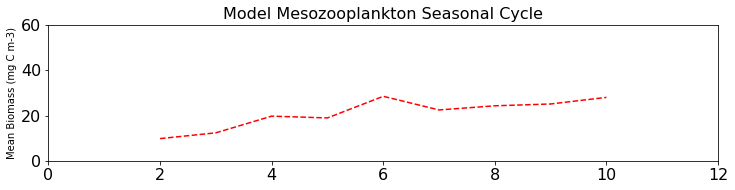

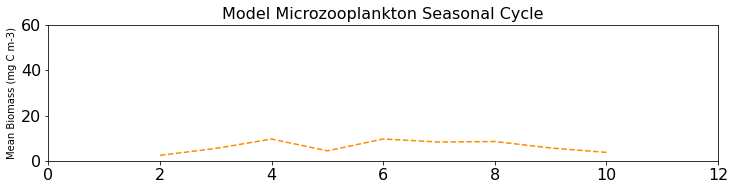

In [132]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanNorthern['L10TotalOld']),'--',color='blue',label='Old Biomass')
ax.plot(logt_inv(monthlymeanNorthern['L10TotalNew']),'--',color='lightblue',label='New Biomass')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Northern SoG Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanNorthern['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanNorthern['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

Text(0, 0.5, 'Mean Biomass (mg C m-3)')

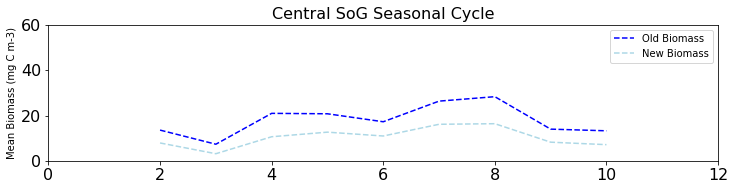

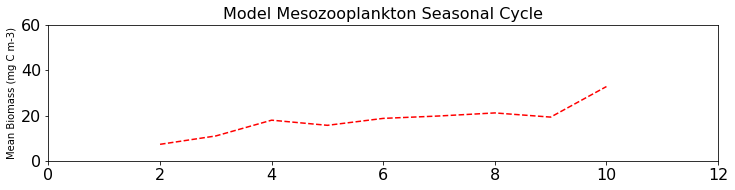

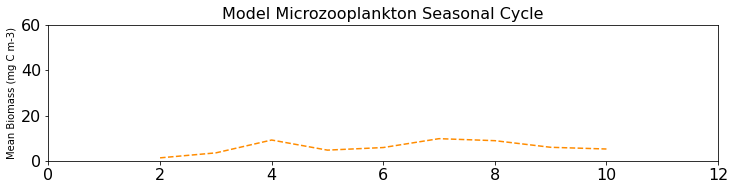

In [130]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanCentral['L10TotalOld']),'--',color='blue',label='Old Biomass')
ax.plot(logt_inv(monthlymeanCentral['L10TotalNew']),'--',color='lightblue',label='New Biomass')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Central SoG Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanCentral['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanCentral['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,60)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

Text(0, 0.5, 'Mean Biomass (mg C m-3)')

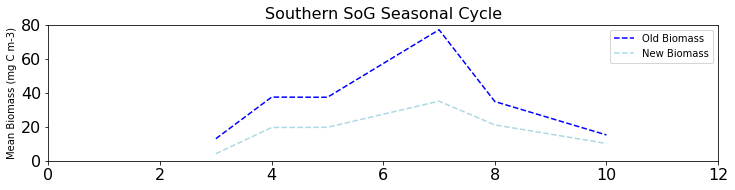

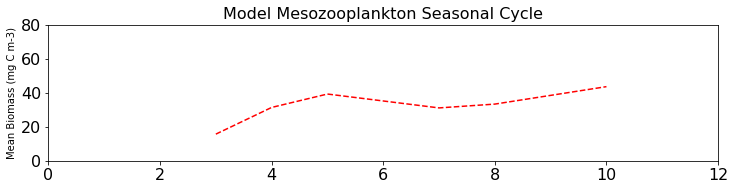

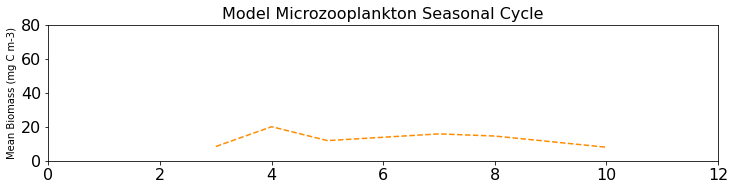

In [131]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanSouthern['L10TotalOld']),'--',color='blue',label='Old Biomass')
ax.plot(logt_inv(monthlymeanSouthern['L10TotalNew']),'--',color='lightblue',label='New Biomass')
ax.set_ylim(0,80)
ax.set_xlim(0,12)
ax.set_title('Southern SoG Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanSouthern['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,80)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanSouthern['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,80)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

Text(0, 0.5, 'Mean Biomass (mg C m-3)')

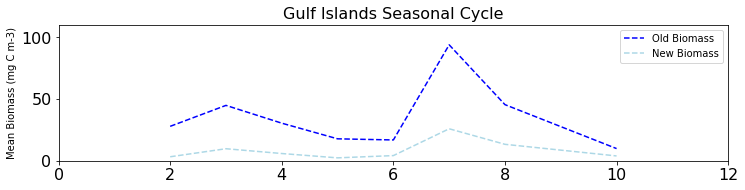

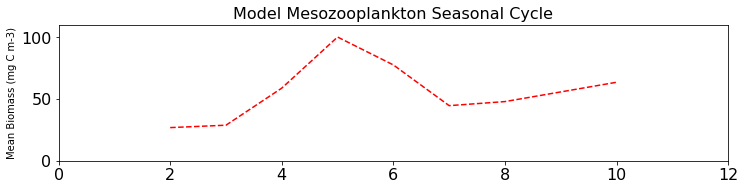

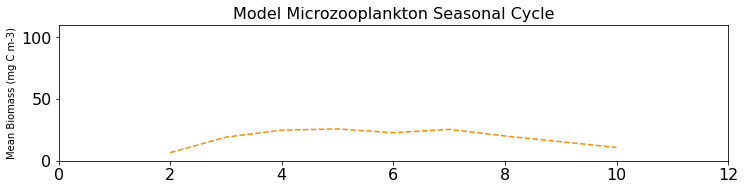

In [132]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanGulfIslands['L10TotalOld']),'--',color='blue',label='Old Biomass')
ax.plot(logt_inv(monthlymeanGulfIslands['L10TotalNew']),'--',color='lightblue',label='New Biomass')
ax.set_ylim(0,110)
ax.set_xlim(0,12)
ax.set_title('Gulf Islands Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanGulfIslands['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,110)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanGulfIslands['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,110)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

Text(0, 0.5, 'Mean Biomass (mg C m-3)')

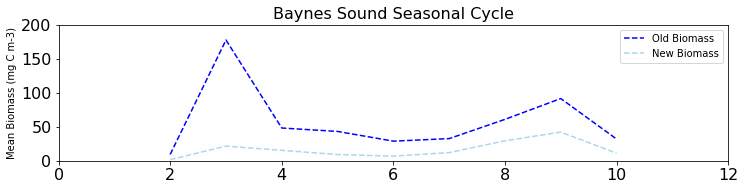

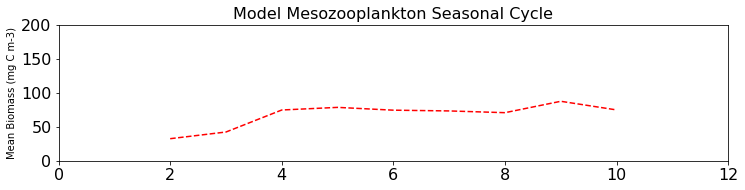

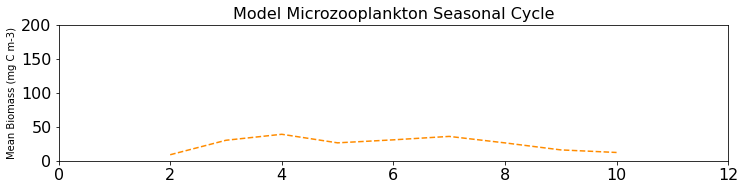

In [133]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanBaynes['L10TotalOld']),'--',color='blue',label='Old Biomass')
ax.plot(logt_inv(monthlymeanBaynes['L10TotalNew']),'--',color='lightblue',label='New Biomass')
ax.set_ylim(0,200)
ax.set_xlim(0,12)
ax.set_title('Baynes Sound Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanBaynes['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,200)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanBaynes['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,200)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

Text(0, 0.5, 'Mean Biomass (mg C m-3)')

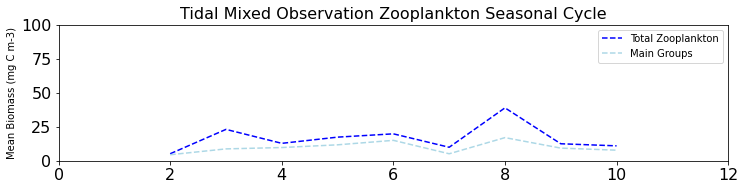

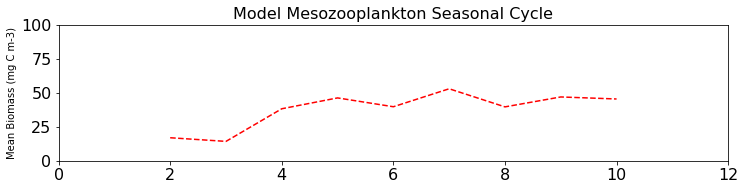

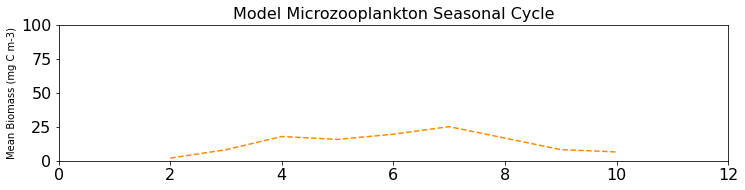

In [134]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanTidal['L10TotalOld']),'--',color='blue',label='Total Zooplankton')
ax.plot(logt_inv(monthlymeanTidal['L10TotalNew']),'--',color='lightblue',label='Main Groups')
ax.set_ylim(0,100)
ax.set_xlim(0,12)
ax.set_title('Tidal Mixed Observation Zooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanTidal['L10mod_mesozooplankton']),'--',color='red',label='Model Microzoop')
ax.set_ylim(0,100)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymeanTidal['L10mod_microzooplankton']),'--',color='darkorange',label='Model Microzoop')
ax.set_ylim(0,100)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton Seasonal Cycle')
ax.set_ylabel('Mean Biomass (mg C m-3)',fontsize=10)

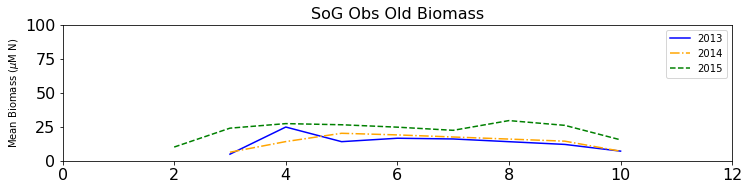

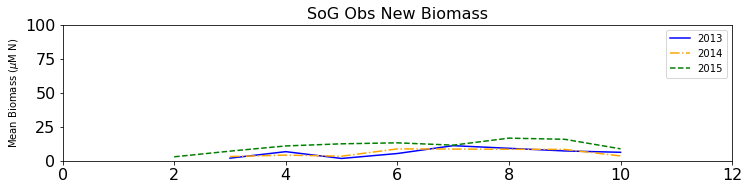

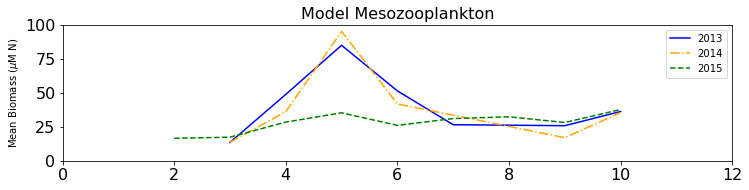

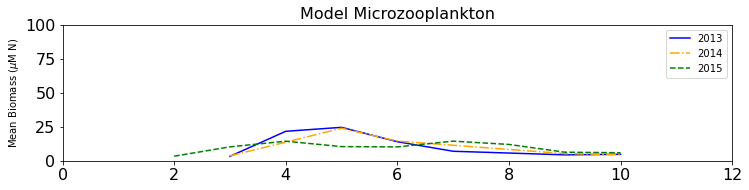

In [135]:
fig,ax=plt.subplots(1,1,figsize=(12,2.5))

ax.plot(logt_inv(monthlymean2013['L10TotalOld']),'-',color='blue',label='2013')
ax.plot(logt_inv(monthlymean2014['L10TotalOld']),'-.',color='orange',label='2014')
ax.plot(logt_inv(monthlymean2015['L10TotalOld']),'--',color='green',label='2015')
ax.set_ylim(0,100)
ax.set_xlim(0,12)
ax.set_title('SoG Obs Old Biomass')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean2013['L10TotalNew']),'-',color='blue',label='2013')
ax.plot(logt_inv(monthlymean2014['L10TotalNew']),'-.',color='orange',label='2014')
ax.plot(logt_inv(monthlymean2015['L10TotalNew']),'--',color='green',label='2015')
ax.set_ylim(0,100)
ax.set_xlim(0,12)
ax.set_title('SoG Obs New Biomass')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean2013['L10mod_mesozooplankton']),'-',color='blue',label='2013')
ax.plot(logt_inv(monthlymean2014['L10mod_mesozooplankton']),'-.',color='orange',label='2014')
ax.plot(logt_inv(monthlymean2015['L10mod_mesozooplankton']),'--',color='green',label='2015')
ax.set_ylim(0,100)
ax.set_xlim(0,12)
ax.set_title('Model Mesozooplankton')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

fig,ax=plt.subplots(1,1,figsize=(12,2.5))
ax.plot(logt_inv(monthlymean2013['L10mod_microzooplankton']),'-',color='blue',label='2013')
ax.plot(logt_inv(monthlymean2014['L10mod_microzooplankton']),'-.',color='orange',label='2014')
ax.plot(logt_inv(monthlymean2015['L10mod_microzooplankton']),'--',color='green',label='2015')
ax.set_ylim(0,100)
ax.set_xlim(0,12)
ax.set_title('Model Microzooplankton')
ax.set_ylabel('Mean Biomass ($\mu$M N)',fontsize=10)
ax.legend(fontsize=10)

In [136]:
cm1=cmocean.cm.thermal
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_201702.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

In [137]:
def yd(idt):
    if type(idt)==dt.datetime:
        yd=(idt-dt.datetime(idt.year-1,12,31)).days
    else: # assume array or pandas
        yd=[(ii-dt.datetime(ii.year-1,12,31)).days for ii in idt]
    return yd

data['yd']=yd(data['dtUTC'])
data['Year']=[ii.year for ii in data['dtUTC']]

#### By Day of Year

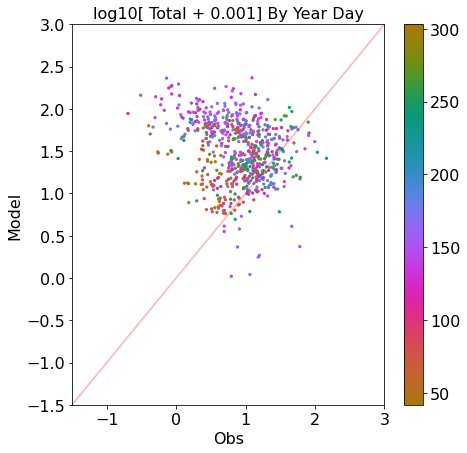

In [138]:
fig,ax=plt.subplots(1,1,figsize=(7,7))
m=ax.scatter((data['L10TotalNew']),(data['L10mod_mesozooplankton']),
          c=data['yd'],s=5,cmap=cmocean.cm.phase)

ax.set_title('log10[ Total + 0.001] By Year Day')
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
ax.set_xlim(-1.5,3)
ax.set_ylim(-1.5,3);
fig.colorbar(m)

In [139]:
data['Month']=[ii.month for ii in data['dtUTC']]
JF=data.loc[(data.Month==1)|(data.Month==2)]
MAM=data.loc[(data.Month==3)|(data.Month==4)|(data.Month==5)]
JJA=data.loc[(data.Month==6)|(data.Month==7)|(data.Month==8)]
SOND=data.loc[(data.Month==9)|(data.Month==10)|(data.Month==11)|(data.Month==12)]

In [140]:


def byRegion(ax,obsvar,modvar,lims):
    SoG=[]
    for ind, iregion in enumerate(data.region_name.unique()):
        #ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
                #color = colors[ind], label=iregion)
        SoG0=et.varvarPlot(ax,datreg[iregion],obsvar,modvar,
                          cols=(colors[ind],),lname=iregion)
        SoG.append(SoG0)
        
    l=ax.legend(handles=[ip[0][0] for ip in SoG])
    ax.set_xlabel('Obs')
    ax.set_ylabel('Model')
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SoG,l



In [141]:
def bySeason(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
        axi.set_ylabel('Model')
    SoG=et.varvarPlot(ax[0],JF,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SoG=et.varvarPlot(ax[1],MAM,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SoG=et.varvarPlot(ax[2],JJA,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SoG=et.varvarPlot(ax[3],SOND,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

### Plots of Total Zooplankton vs. model mesozooplankton by Region

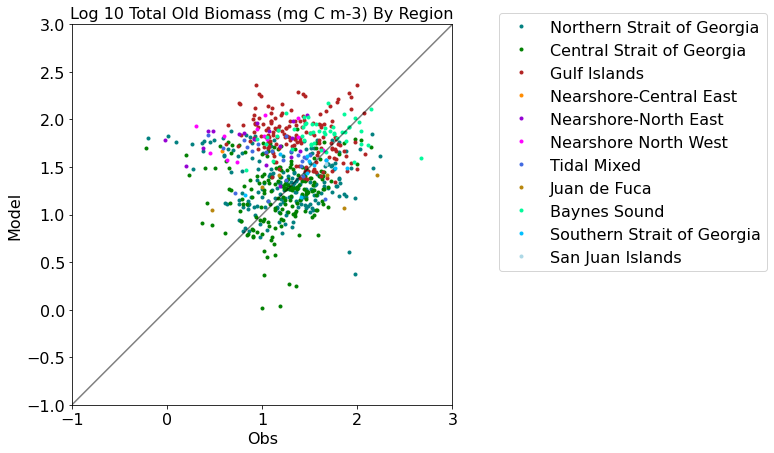

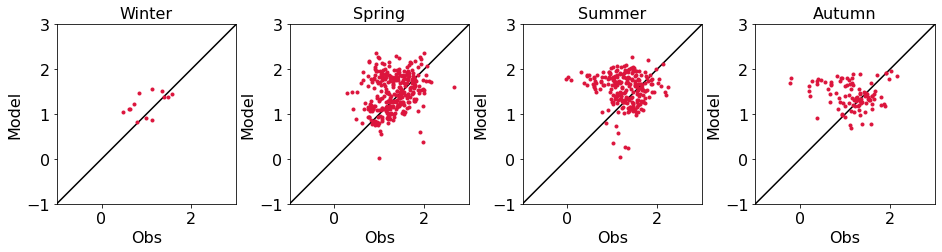

In [142]:
fig, ax = plt.subplots(1,1,figsize = (16,7))     
SoG,l=byRegion(ax,'L10TotalOld','L10mod_mesozooplankton',(-1,3))
ax.set_title('Log 10 Total Old Biomass (mg C m-3) By Region')
ax.legend(bbox_to_anchor=(1.1, 1.05))
#fig.savefig('TotalZoopModelvsObsSoG.png',bbox_inches='tight')

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10TotalOld','L10mod_mesozooplankton',(-1,3))


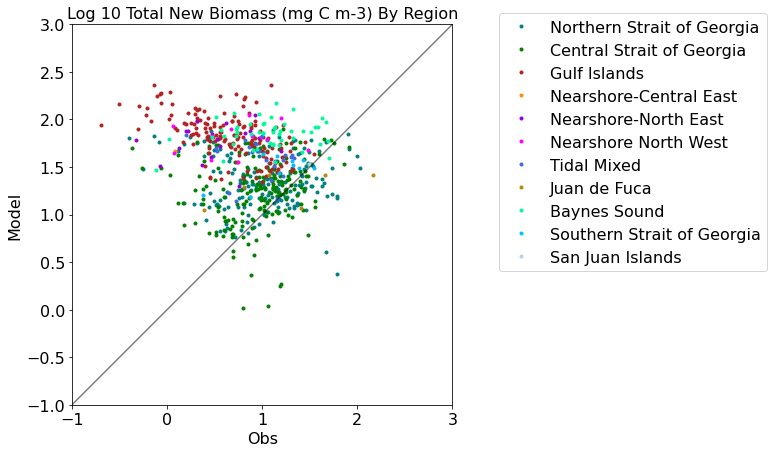

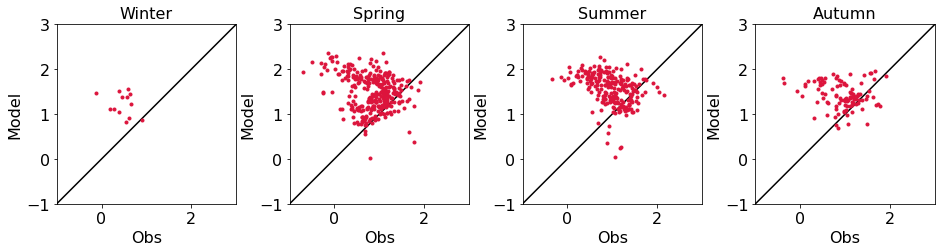

In [143]:
fig, ax = plt.subplots(1,1,figsize = (16,7))     
SoG,l=byRegion(ax,'L10TotalNew','L10mod_mesozooplankton',(-1,3))
ax.set_title('Log 10 Total New Biomass (mg C m-3) By Region')
ax.legend(bbox_to_anchor=(1.1, 1.05))
#fig.savefig('TotalZoopModelvsObsSoG.png',bbox_inches='tight')

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10TotalNew','L10mod_mesozooplankton',(-1,3))



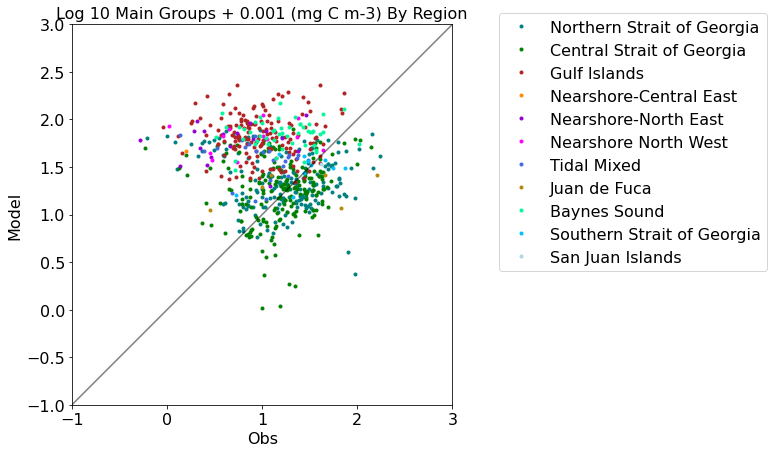

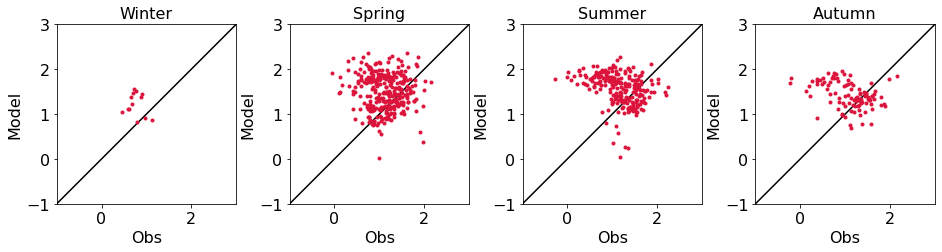

In [144]:
fig, ax = plt.subplots(1,1,figsize = (16,7))     
SoG,l=byRegion(ax,'L10MainGroupsOld','L10mod_mesozooplankton',(-1,3))
ax.set_title('Log 10 Main Groups + 0.001 (mg C m-3) By Region')
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10MainGroupsOld','L10mod_mesozooplankton',(-1,3))

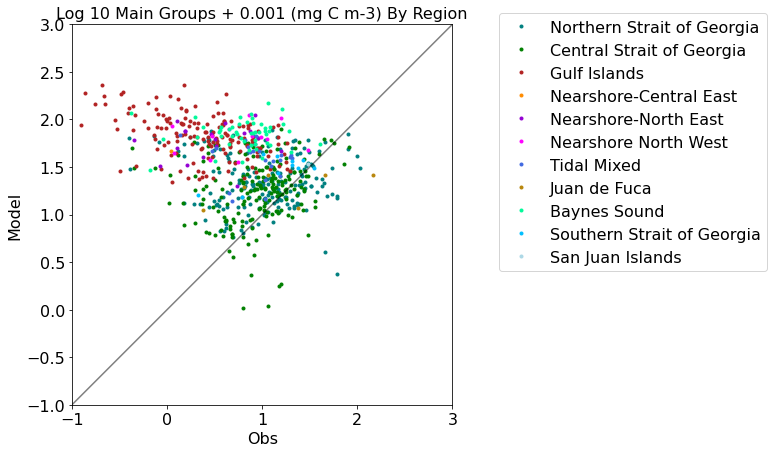

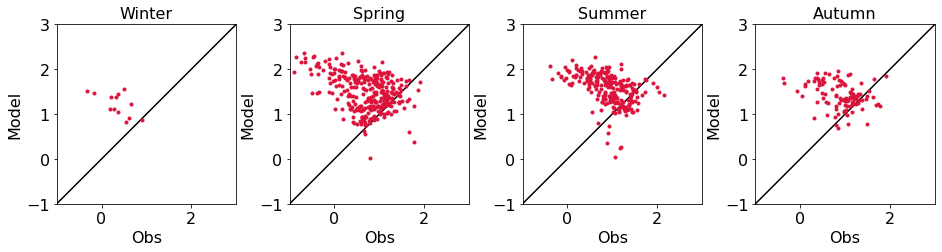

In [145]:
fig, ax = plt.subplots(1,1,figsize = (16,7))     
SoG,l=byRegion(ax,'L10MainGroupsNew','L10mod_mesozooplankton',(-1,3))
ax.set_title('Log 10 Main Groups + 0.001 (mg C m-3) By Region')
ax.legend(bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason(ax,'L10MainGroupsNew','L10mod_mesozooplankton',(-1,3))

#### 

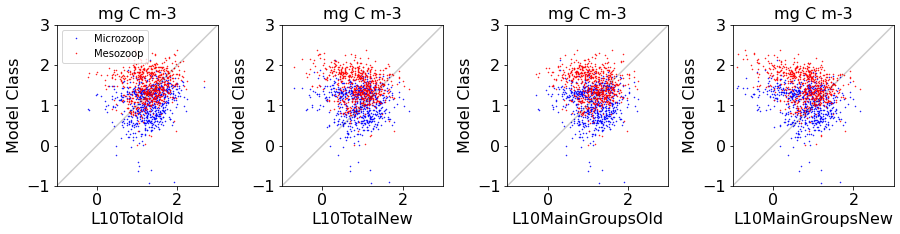

In [146]:
fig,ax=plt.subplots(1,4,figsize=(15,7))
fig.subplots_adjust(wspace=.4)
fig.subplots_adjust(hspace=.6)
ax=ax.flatten()

taxa=('L10TotalOld','L10TotalNew', 'L10MainGroupsOld','L10MainGroupsNew')

mvar1=data['L10mod_microzooplankton']
mvar2=data['L10mod_mesozooplankton']

for ii in range(0,len(taxa)):
    ax[ii].plot((data.loc[:,[taxa[ii]]].values),(mvar1),'.',ms=1,color='blue',label='Microzoop')
    ax[ii].plot((data.loc[:,[taxa[ii]]].values),(mvar2),'.',ms=1,color='red',label='Mesozoop')
    ax[ii].set_ylabel('Model Class')
    ax[ii].set_xlabel(taxa[ii])
    ax[ii].set_title('mg C m-3')
    ax[ii].plot((-3,3),(-3,3),'k-',alpha=.2)
    ax[ii].set_xlim((-1,3))
    ax[ii].set_ylim((-1,3))
    ax[ii].set_aspect(1)
ax[0].legend(loc=2, fontsize = 'medium')